1. Etapa de Importação de banco de dados e tratamento inicial dos dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data = train_data[train_data['Embarked'].notna()]

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [4]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [5]:
train_data.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

2. Etapa de verificação de correlacionamento das variáveis

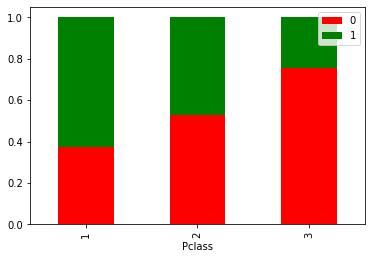

In [6]:
import seaborn as sns

data = pd.crosstab(train_data['Pclass'], train_data['Survived'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['red', 'green'], grid=False)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Count'>

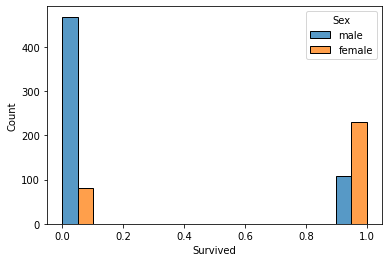

In [7]:
sns.histplot(x="Survived", data=train_data, bins=10, hue='Sex', element='bars', multiple='dodge')

<AxesSubplot:xlabel='Age', ylabel='Count'>

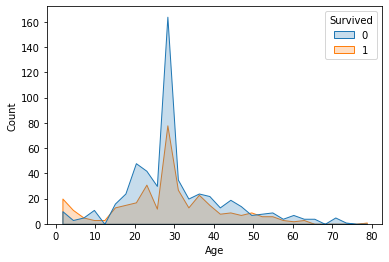

In [8]:
sns.histplot(x='Age', data=train_data, hue='Survived', element='poly')

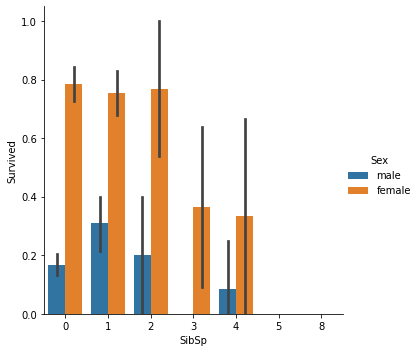

In [9]:
sns.catplot(x="SibSp", y="Survived",hue='Sex', data=train_data, kind="bar", height=5, aspect=1)

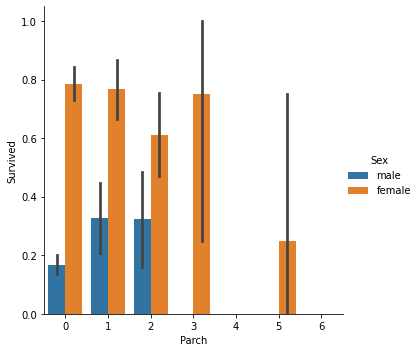

In [10]:
sns.catplot(x="Parch", y="Survived",hue='Sex', data=train_data, kind="bar", height=5, aspect=1)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

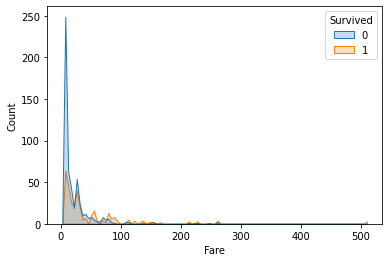

In [11]:
sns.histplot(x='Fare', data=train_data, hue='Survived', element='poly')

<AxesSubplot:xlabel='Sex,Survived'>

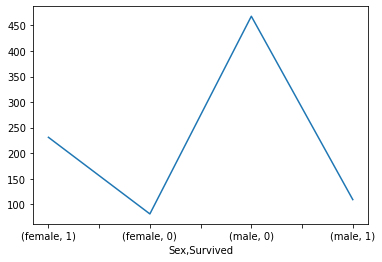

In [12]:
train_data.groupby('Sex')['Survived'].value_counts().plot()

<AxesSubplot:>

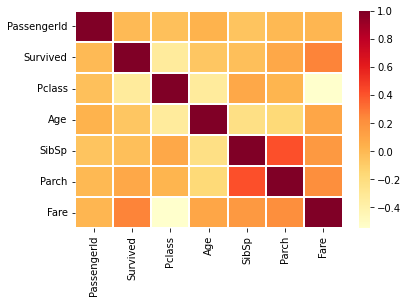

In [14]:
corr = train_data.corr(method='pearson')

sns.heatmap(corr, cmap='YlOrRd', linewidths=0.1)

Destes gráficos, tentar tirar informação das principais variáveis para preparação dos dados para treinar o modelo.

Por enquanto, relacionar as colunas:

<li>Pclass</li>
<li>Sex</li>
<li>Age</li>
<li>SibSp</li>
<li>Parch</li>

A coluna Fare não possui, holísticamente, uma correlação que consigamos fazer qualquer análise inicial, portanto, é melhor que a tiramos do nosso modelo.